<h3> Import Libraries </h3>

In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool2D, Flatten, Conv2D
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import scipy.io as io 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix

<h3> Extract data </h3>

In [2]:
data = io.loadmat("WLDataCW.mat")
data_only =  data["data"]
label = data["label"]
data_only=data_only.T
label=label.T
data_shape = data_only.shape
label_shape = label.shape
print(data_shape, label_shape)

(360, 512, 62) (360, 1)


<h3> Split data into Train and Test Set </h3>

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data_only, label, test_size=0.25, random_state=50)

<h3> CNN Model Architecture </h3>

In [4]:
cnn_model = keras.models.Sequential()
cnn_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 62, 1)))
cnn_model.add(keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2)))

cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(keras.layers.Conv2D(50, (3, 3), activation='relu'))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

<h3> Model Summary </h3>

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 60, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 30, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 28, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 14, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 12, 64)       36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 6, 64)        0

<h3> Compile and Fit Model </h3>

In [6]:
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
cnn_history01= cnn_model.fit(X_train, y_train, batch_size=20, epochs=30)
test_loss, acc_score = cnn_model.evaluate(X_test, y_test, verbose=2)
print(acc_score*100)

Epoch 1/30
14/14 [==============================] - 8s 481ms/step - loss: 1.9488 - accuracy: 0.5037
Epoch 2/30
14/14 [==============================] - 6s 448ms/step - loss: 0.5873 - accuracy: 0.7000
Epoch 3/30
14/14 [==============================] - 6s 437ms/step - loss: 0.3618 - accuracy: 0.8926
Epoch 4/30
14/14 [==============================] - 7s 480ms/step - loss: 0.2970 - accuracy: 0.9148
Epoch 5/30
14/14 [==============================] - 8s 528ms/step - loss: 0.2581 - accuracy: 0.9259
Epoch 6/30
14/14 [==============================] - 7s 489ms/step - loss: 0.1902 - accuracy: 0.9444
Epoch 7/30
14/14 [==============================] - 7s 473ms/step - loss: 0.1197 - accuracy: 0.9815
Epoch 8/30
14/14 [==============================] - 7s 474ms/step - loss: 0.0570 - accuracy: 0.9815
Epoch 9/30
14/14 [==============================] - 7s 481ms/step - loss: 0.0245 - accuracy: 0.9963
Epoch 10/30
14/14 [==============================] - 7s 472ms/step - loss: 0.0066 - accuracy: 1.0000

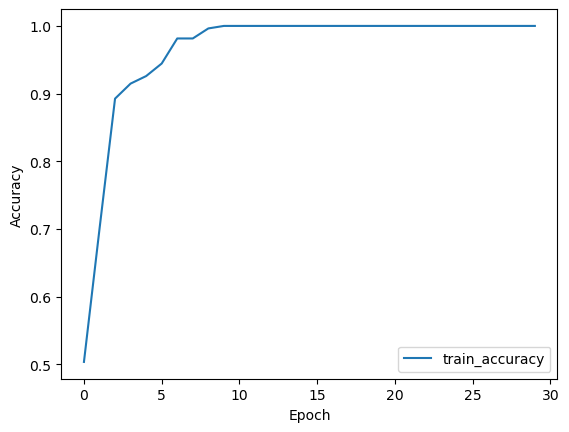

In [7]:
plt.plot(cnn_history01.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

<h3> Evaluation using KFold cross validation </h3>

In [8]:
cv = KFold(n_splits=5, shuffle=True, random_state=24)

<h3> Compile and Fit Model with KFold cross validation </h3>

In [9]:
cnn_accuracies = []

for train_ind, test_ind in cv.split(data_only):
    x_train, x_test, y_train, y_test = data_only[train_ind], data_only[test_ind], label[train_ind], label[test_ind]

    cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    cnn_history= cnn_model.fit(x_train, y_train, batch_size=20, epochs=2)
    test_loss, acc_score = cnn_model.evaluate(x_test, y_test, verbose=2)
    cnn_accuracies.append(acc_score)

print(cnn_accuracies)

Epoch 1/2
15/15 [==============================] - 8s 505ms/step - loss: 0.4116 - accuracy: 0.9549
Epoch 2/2
15/15 [==============================] - 8s 496ms/step - loss: 0.1170 - accuracy: 0.9653
3/3 - 1s - loss: 0.0622 - accuracy: 1.0000 - 554ms/epoch - 185ms/step
Epoch 1/2
15/15 [==============================] - 8s 467ms/step - loss: 0.1311 - accuracy: 0.9583
Epoch 2/2
15/15 [==============================] - 7s 458ms/step - loss: 0.2642 - accuracy: 0.9306
3/3 - 1s - loss: 0.0810 - accuracy: 0.9861 - 544ms/epoch - 181ms/step
Epoch 1/2
15/15 [==============================] - 8s 459ms/step - loss: 0.1980 - accuracy: 0.9410
Epoch 2/2
15/15 [==============================] - 7s 475ms/step - loss: 0.0844 - accuracy: 0.9722
3/3 - 1s - loss: 0.0596 - accuracy: 0.9861 - 544ms/epoch - 181ms/step
Epoch 1/2
15/15 [==============================] - 8s 468ms/step - loss: 0.0587 - accuracy: 0.9826
Epoch 2/2
15/15 [==============================] - 7s 464ms/step - loss: 0.0831 - accuracy: 0.972

In [10]:
mean_score = np.mean(cnn_accuracies)

In [11]:
print((mean_score)*100)

96.66666626930237


<h3>Training Accuracy Plot</h3>

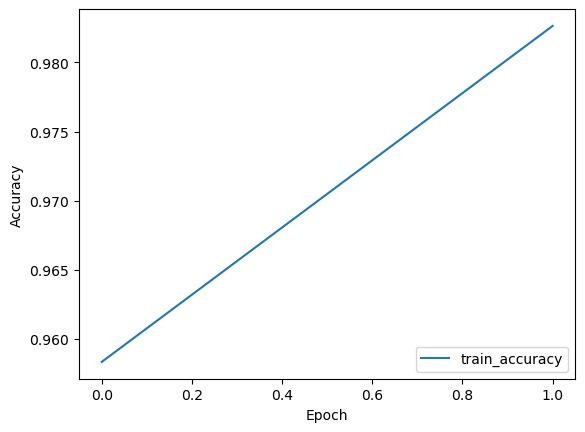

In [12]:
plt.plot(cnn_history.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')